# Bike sharing Assignment

### 1. Reading and Understanding of Data

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
Boombikes = pd.read_csv("day.csv")
Boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [194]:
Boombikes.shape

(730, 16)

In [195]:
Boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [196]:
Boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [197]:
Boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [198]:
Boombikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [199]:
Boombikes.rename(columns = {'yr':'Year','mnth':'month','temp':'temperature','hum':'humidity','cnt':'count'}, inplace = True)

In [200]:
Boombikes['season']=Boombikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
Boombikes['month']=Boombikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
Boombikes['weathersit']=Boombikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
Boombikes['weekday']=Boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

Boombikes.head()


,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### EDA 

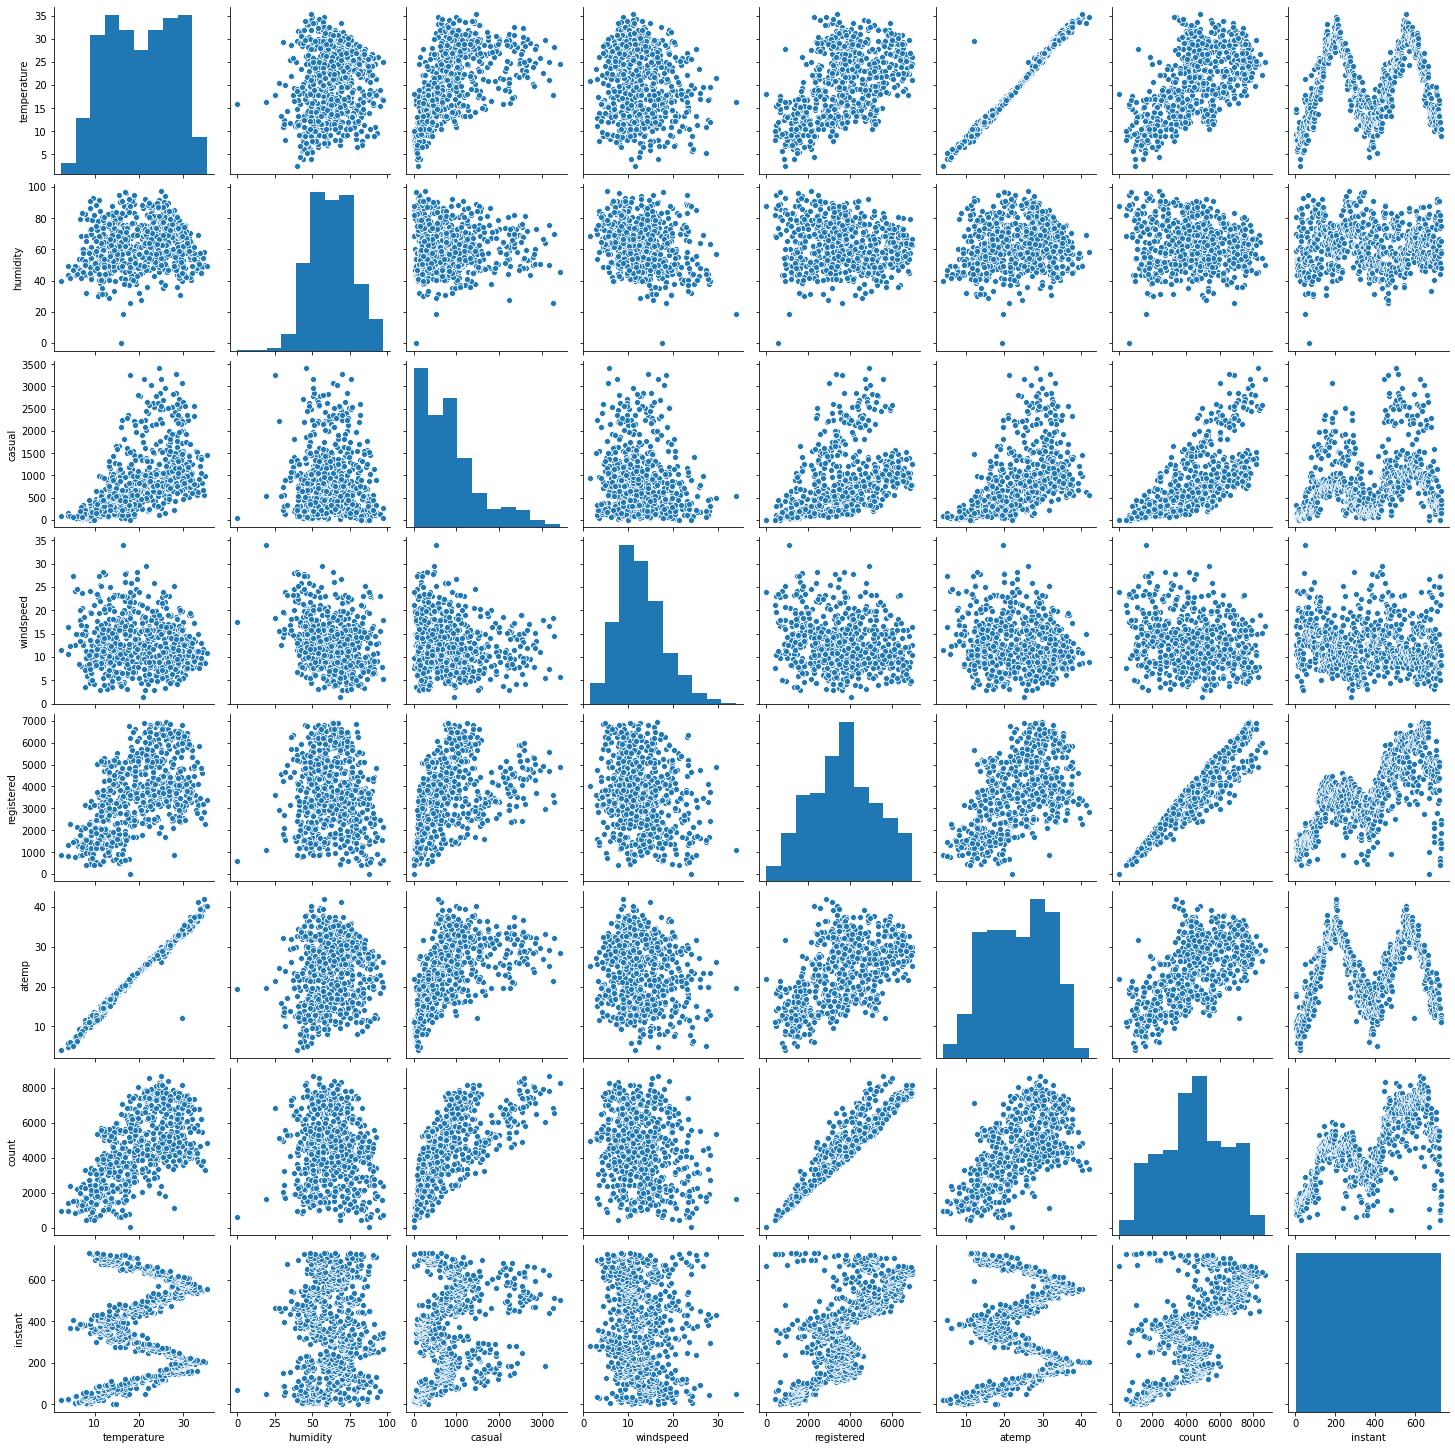

In [201]:
sns.pairplot(Boombikes, vars=["temperature", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

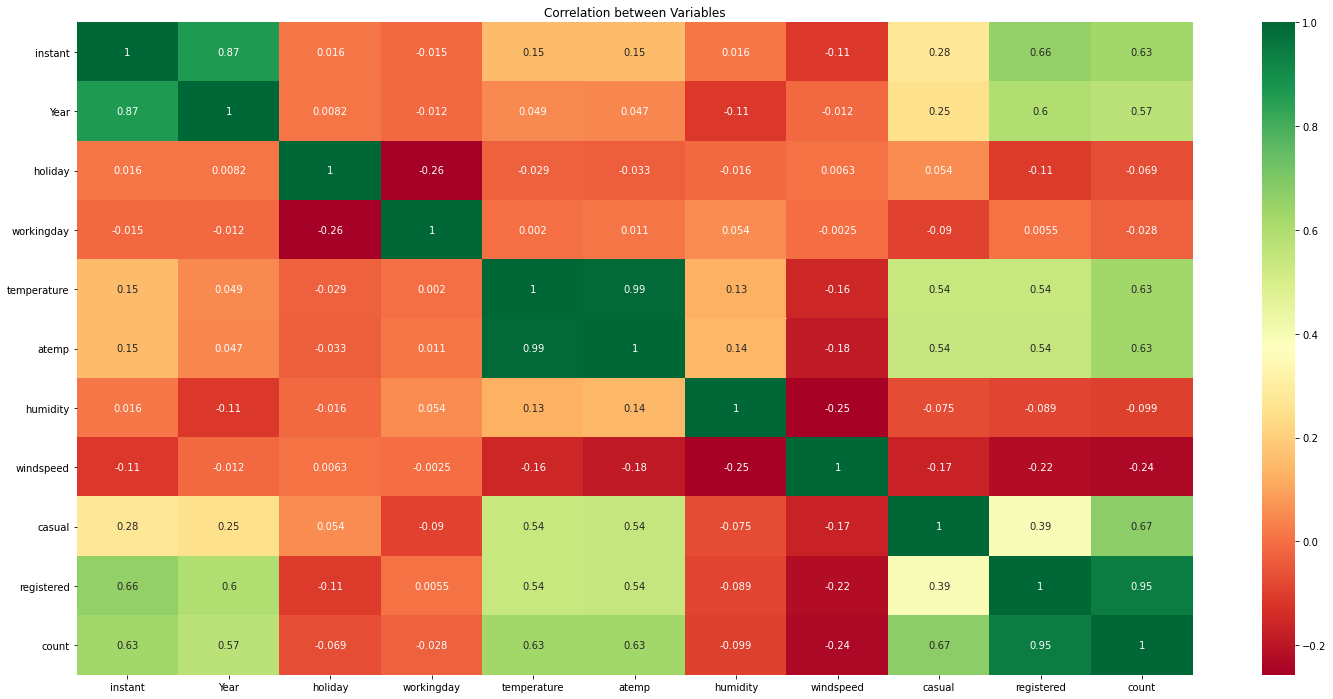

In [202]:
plt.figure(figsize=(25, 12))
sns.heatmap(Boombikes.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

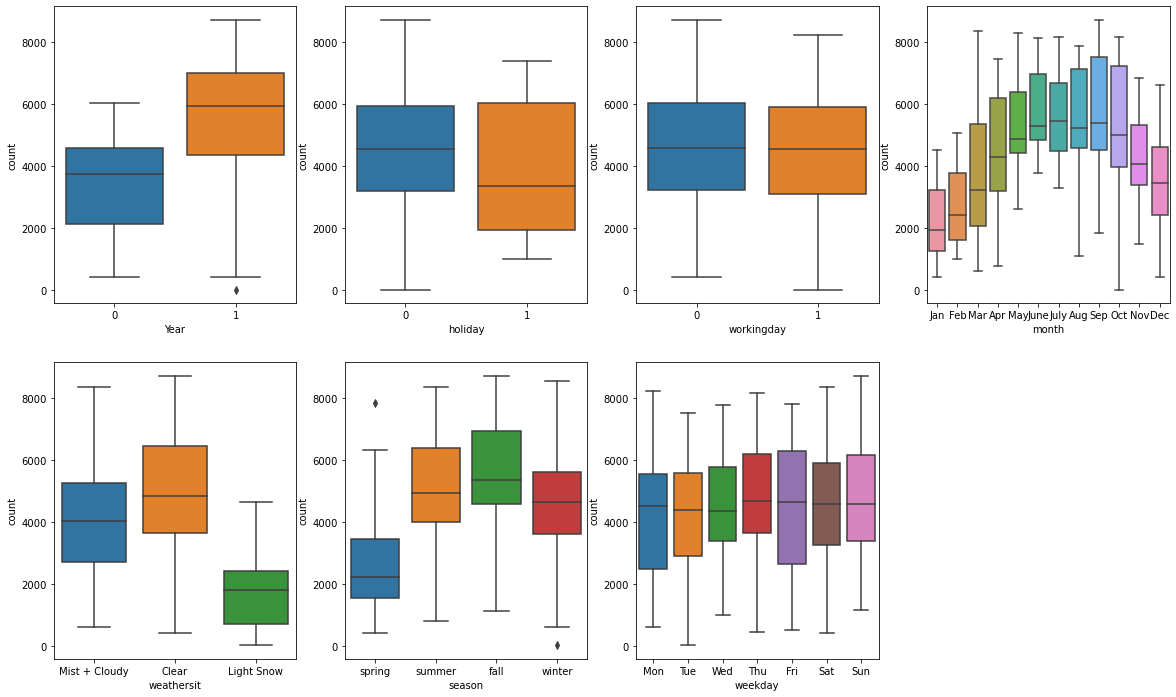

In [203]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = Boombikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = Boombikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = Boombikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = Boombikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = Boombikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = Boombikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = Boombikes)
plt.show()

### Lets visualise the variables better

#### 1. Month

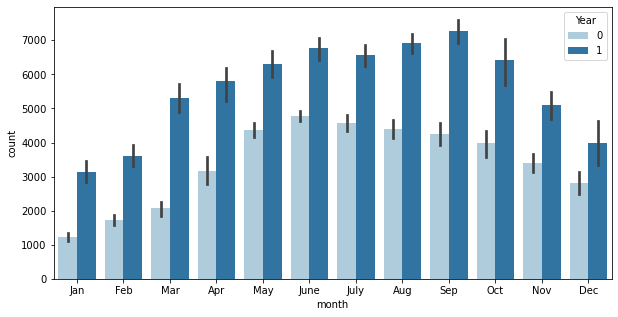

In [204]:
#Relation between month and count variables
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=Boombikes,palette='Paired')
plt.show()


##### Bike rentals are more in year 2019 then 2018

#### 2. Season

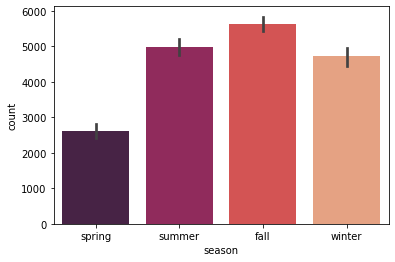

In [205]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=Boombikes,palette="rocket",)
plt.show()


##### Bike rentals are more dunring Fall season

#### 3. Weathersit

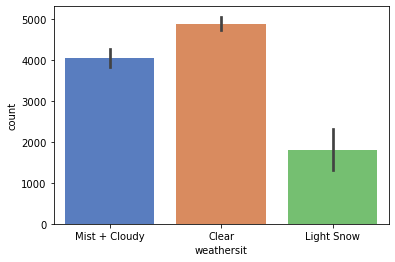

In [206]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=Boombikes)
plt.show()
 

#### Bike rentals are more in Clear weathersit 

#### 4. Year

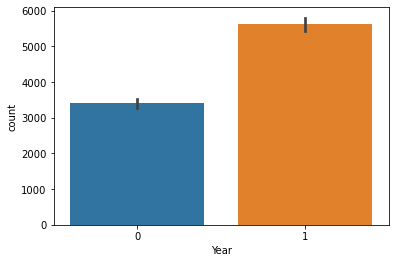

In [207]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=Boombikes)
plt.show()


In [208]:
#### Bike rentals are more in year 2019

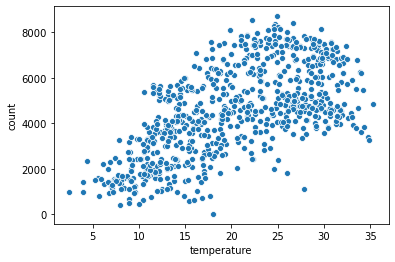

In [209]:
#scatter plot for temperature to count
sns.scatterplot(x='temperature',y='count' ,data=Boombikes)
plt.show()


In [210]:
Boombikes=Boombikes.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
Boombikes.head()


,season,Year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Preparing for data Modelling

#### 1. Create Dummy Variables

In [211]:
months=pd.get_dummies(Boombikes.month,drop_first=True)
weekdays=pd.get_dummies(Boombikes.weekday,drop_first=True)
weather_sit=pd.get_dummies(Boombikes.weathersit,drop_first=True)
seasons=pd.get_dummies(Boombikes.season,drop_first=True)
Boombikes = pd.concat([months, weekdays,weather_sit, seasons, Boombikes], axis=1)
Boombikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [212]:
Boombikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
Boombikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


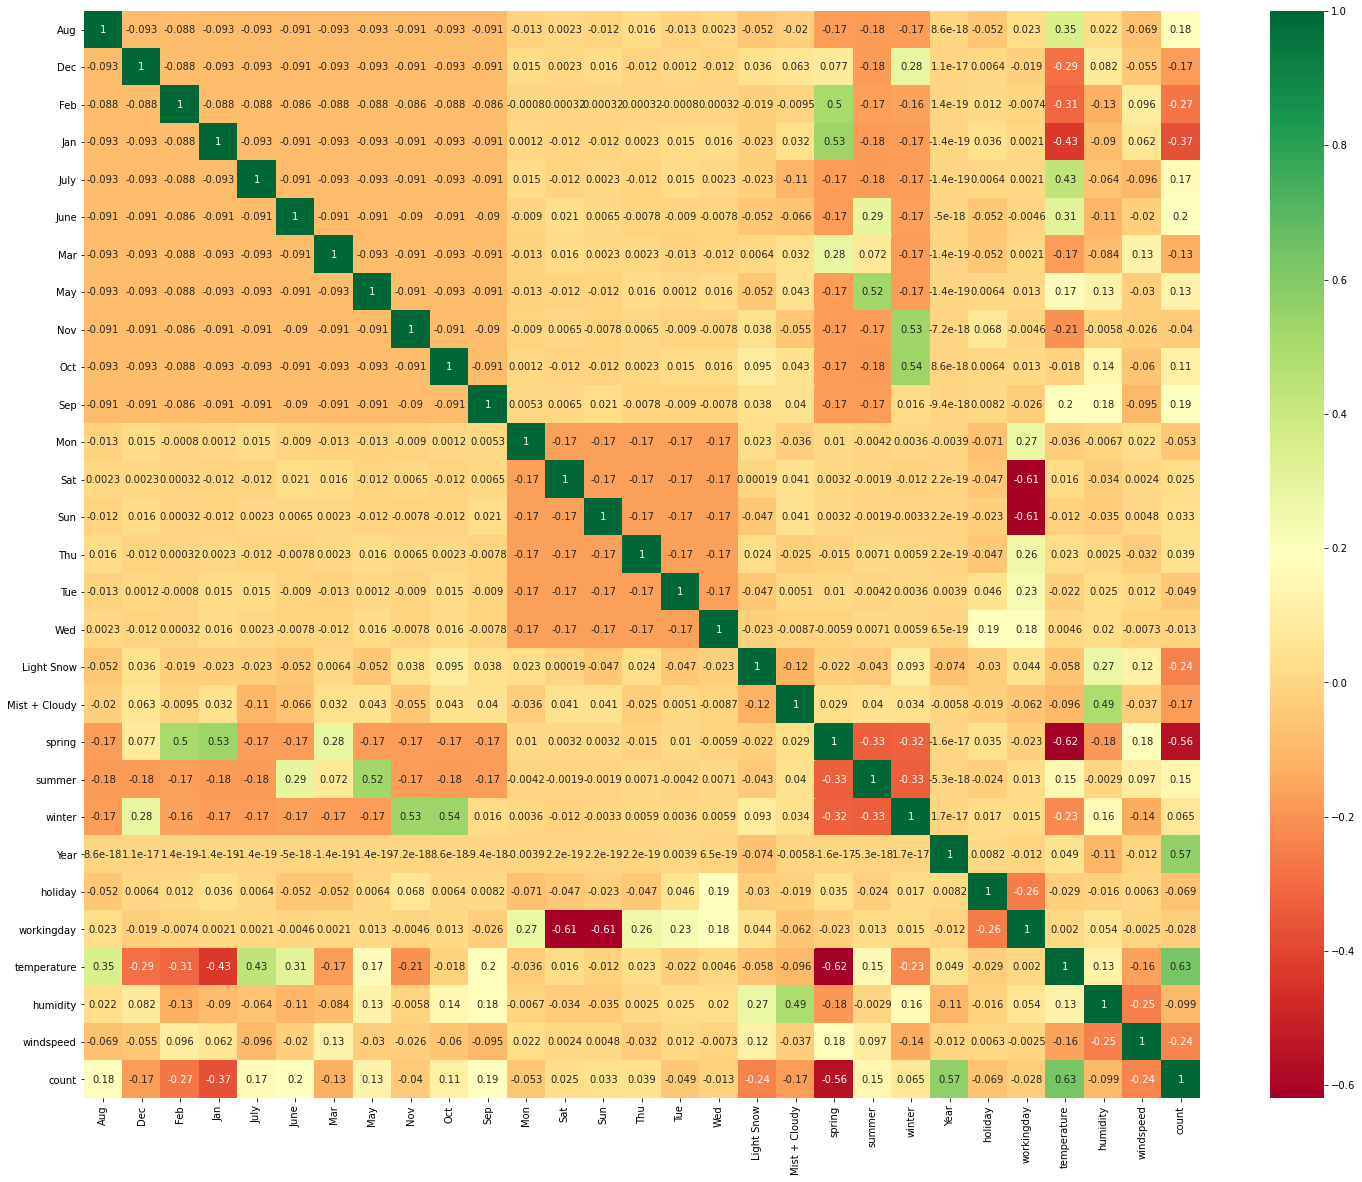

In [213]:
plt.figure(figsize=(25, 20))
sns.heatmap(Boombikes.corr(), cmap='RdYlGn', annot = True)
plt.show()

#### 2. Spliting Data into training and testing sets

In [214]:
import sklearn 
from sklearn.model_selection import train_test_split

In [215]:
np.random.seed(0)
Boombikes_train, Boombikes_test = train_test_split(Boombikes, train_size=0.7, random_state=100)
print(Boombikes_train.shape)
print(Boombikes_test.shape)


(510, 29)
(220, 29)


#### 3. Scaling variables

In [216]:
from sklearn.preprocessing import MinMaxScaler


In [217]:
#Instantiate an object
scaler = MinMaxScaler()
num_var = ['temperature','humidity','windspeed','count']
Boombikes_train[num_var] = scaler.fit_transform(Boombikes_train[num_var])
Boombikes_train.head()

<ipython-input-217-1d46a6d89fa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boombikes_train[num_var] = scaler.fit_transform(Boombikes_train[num_var])
/Users/aarnajaiswal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


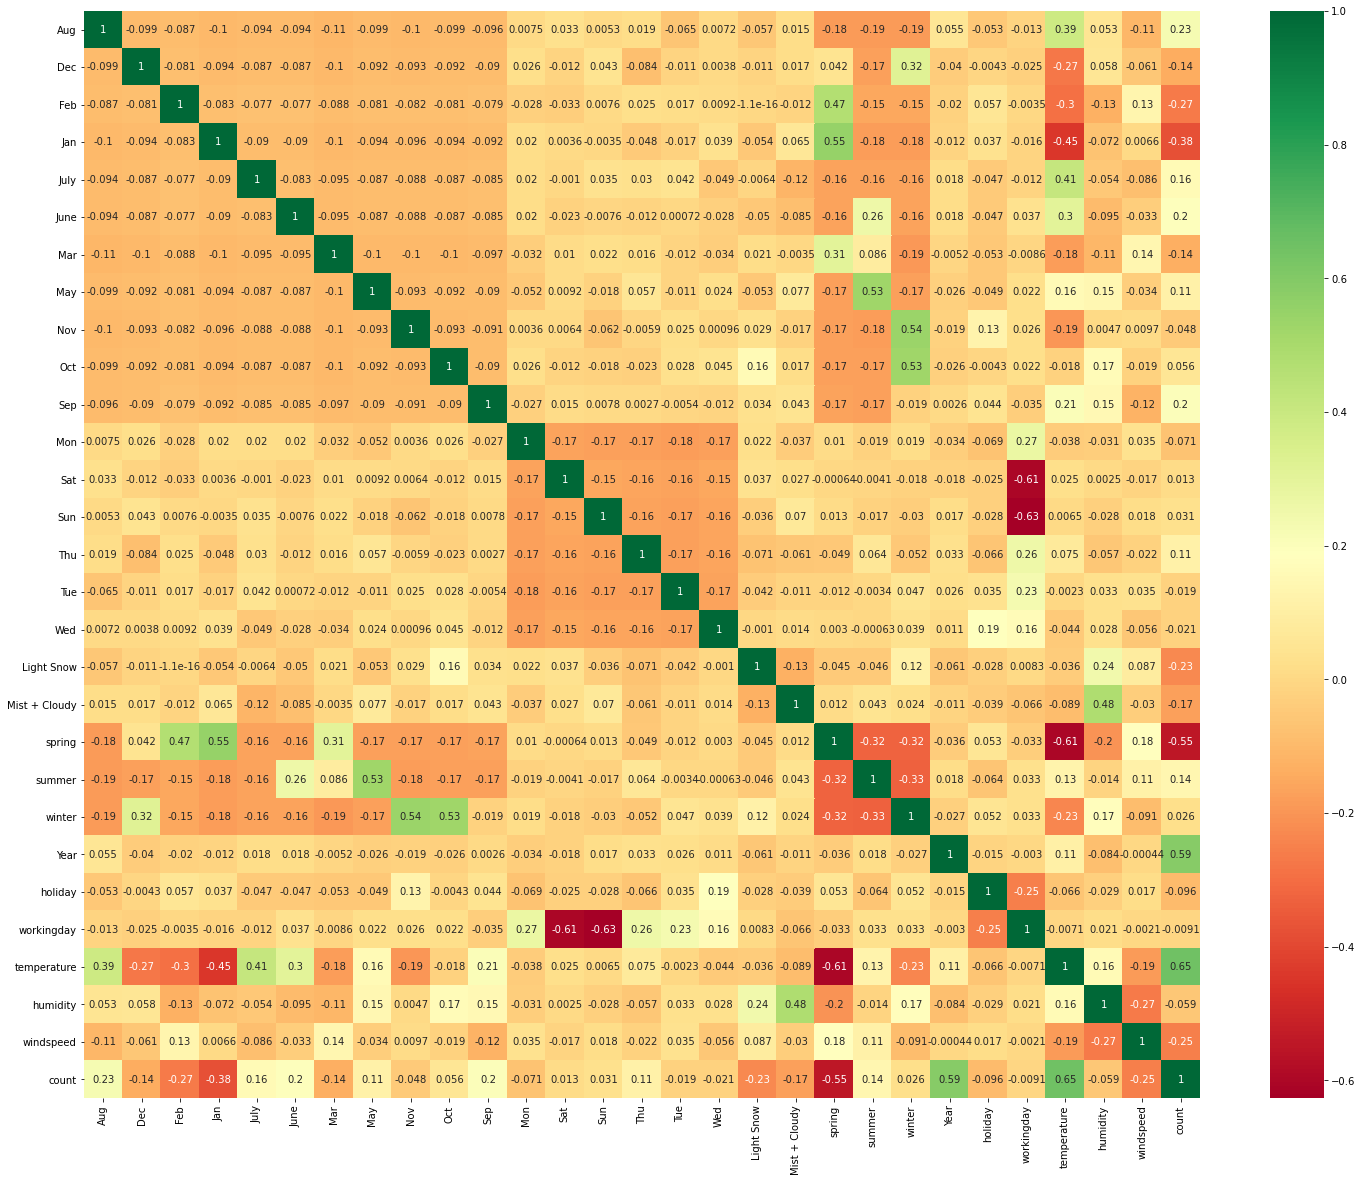

In [218]:
plt.figure(figsize=(25, 20))
sns.heatmap(Boombikes_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

In [219]:
Boombikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [220]:
Boombikes_train.nunique()

Aug                2
Dec                2
Feb                2
Jan                2
July               2
June               2
Mar                2
May                2
Nov                2
Oct                2
Sep                2
Mon                2
Sat                2
Sun                2
Thu                2
Tue                2
Wed                2
Light Snow         2
Mist + Cloudy      2
spring             2
summer             2
winter             2
Year               2
holiday            2
workingday         2
temperature      386
humidity         444
windspeed        467
count            493
dtype: int64

In [221]:
Boombikes_train['Sat'].value_counts()

0    444
1     66
Name: Sat, dtype: int64

In [222]:
Boombikes.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'workingday', 'temperature', 'humidity', 'windspeed', 'count'],
      dtype='object')

### Dividing into X and Y sets for the model building

In [223]:
y_train = Boombikes_train.pop('count')
X_train = Boombikes_train

In [224]:
import statsmodels.api as sm 

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [227]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Users/aarnajaiswal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [228]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [229]:
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temperature',
       'humidity', 'windspeed'],
      dtype='object')

In [230]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [231]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [232]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.15e-189
Time:                        15:00:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [233]:
### calculating VIF 
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,humidity,30.89
12,temperature,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


In [234]:
X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

### Rebuilding the model without `Dec`

In [235]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.41e-189
Time:                        15:00:46   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [236]:
X_train_newD = X_train_new.drop(["Nov"], axis = 1)

In [237]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_newD)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.59e-190
Time:                        15:00:46   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

#### Rebuilding model without Jan

In [238]:
X_train_newJ = X_train_newD.drop(["Jan"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_newJ)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.95e-190
Time:                        15:00:46   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258

In [239]:
#Drop the constant term B0
X_train_lm = X_train_lm.drop(['const'], axis=1)


In [240]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_newJ
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,humidity,28.03
9,temperature,16.03
11,windspeed,4.65
4,spring,4.01
6,winter,3.33
5,summer,2.79
3,Mist + Cloudy,2.28
7,Year,2.08
0,July,1.58
1,Sep,1.38


#### Rebuilding model without Humidity

In [241]:
#Drop humidity
X_train_new2 = X_train_newJ.drop(["humidity"], axis = 1)
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.06e-187
Time:                        15:00:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [242]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,temperature,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,Year,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


#### Rebuilding model without Temperature

In [243]:
#Drop temperature
X_train_new3 = X_train_new2.drop(["temperature"], axis = 1)
#Build a model
X_train_lm2 = sm.add_constant(X_train_new3)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.02e-149
Time:                        15:00:47   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5837      0.017     34.708

#### Here we can see that there is a huge drop in R-squared and adjust. R-squared value. so it wont be a good model.

In [244]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,windspeed,3.81
4,spring,2.07
5,summer,2.01
7,Year,1.83
6,winter,1.73
3,Mist + Cloudy,1.52
0,July,1.19
1,Sep,1.16
2,Light Snow,1.08
8,holiday,1.04


#### Rebuilding model without July

In [245]:
#Drop July
X_train_new4 = X_train_new3.drop(["July"], axis = 1)
#Build a model
X_train_lm3 = sm.add_constant(X_train_new4)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.30e-150
Time:                        15:00:47   Log-Likelihood:                 405.99
No. Observations:                 510   AIC:                            -792.0
Df Residuals:                     500   BIC:                            -749.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5790      0.015     39.491

In [246]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,windspeed,3.46
3,spring,1.91
4,summer,1.86
6,Year,1.77
5,winter,1.63
2,Mist + Cloudy,1.51
0,Sep,1.14
1,Light Snow,1.08
7,holiday,1.04


#### Removing windspeed because of its High VIF

In [247]:
#Drop Windspeed
X_train_new5 = X_train_new4.drop(["windspeed"], axis = 1)
#Build a model
X_train_lm4 = sm.add_constant(X_train_new5)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.71e-144
Time:                        15:00:47   Log-Likelihood:                 390.06
No. Observations:                 510   AIC:                            -762.1
Df Residuals:                     501   BIC:                            -724.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5330      0.013     42.322

In [248]:
#Drop the constant
X_train_lm4=X_train_lm4.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Year,1.64
2,Mist + Cloudy,1.50
4,summer,1.35
5,winter,1.35
3,spring,1.31
0,Sep,1.11
1,Light Snow,1.06
7,holiday,1.04


#### Adding variable "working  day" to check if model improves

In [249]:
X_train_new5["workingday"] = X_train["workingday"]
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     166.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.03e-144
Time:                        15:00:47   Log-Likelihood:                 392.19
No. Observations:                 510   AIC:                            -764.4
Df Residuals:                     500   BIC:                            -722.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5501      0.015     36.464

In [250]:
#Drop the constant
X_train_lm5=X_train_lm5.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,workingday,2.60
6,Year,1.76
4,summer,1.65
5,winter,1.65
3,spring,1.59
2,Mist + Cloudy,1.50
0,Sep,1.15
7,holiday,1.08
1,Light Snow,1.06


#### Working day has a high P-value and Hign VIF which means it's significant. Hence Dropping Working day.

In [251]:
#Drop Workingday
X_train_new5 = X_train_new5.drop(["workingday"], axis = 1)
#Build a model
X_train_lm6 = sm.add_constant(X_train_new5)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.71e-144
Time:                        15:00:47   Log-Likelihood:                 390.06
No. Observations:                 510   AIC:                            -762.1
Df Residuals:                     501   BIC:                            -724.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5330      0.013     42.322

#### Rebuilding model by adding Sat

In [252]:
X_train_new5["Sat"] = X_train["Sat"]
#Build a model
X_train_lm7 = sm.add_constant(X_train_new5)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.03e-143
Time:                        15:00:47   Log-Likelihood:                 390.94
No. Observations:                 510   AIC:                            -761.9
Df Residuals:                     500   BIC:                            -719.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5303      0.013     41.577

In [253]:
#sat has high p value, so we drop it.
X_train_new5 = X_train_new5.drop(["Sat"], axis = 1)
#Build a model
X_train_lm7 = sm.add_constant(X_train_new5)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.71e-144
Time:                        15:00:47   Log-Likelihood:                 390.06
No. Observations:                 510   AIC:                            -762.1
Df Residuals:                     501   BIC:                            -724.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5330      0.013     42.322

#### Adding Sun variable to check if model improves

In [254]:
X_train_new5["Sun"] = X_train["Sun"]
#Build a model
X_train_lm8 = sm.add_constant(X_train_new5)
lm8 = sm.OLS(y_train,X_train_lm8).fit()
print(lm8.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.26e-143
Time:                        15:00:47   Log-Likelihood:                 390.73
No. Observations:                 510   AIC:                            -761.5
Df Residuals:                     500   BIC:                            -719.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5306      0.013     41.594

In [255]:
#Sun has high p value, so we drop it.
X_train_new5 = X_train_new5.drop(["Sun"], axis = 1)
#Build a model
X_train_lm8 = sm.add_constant(X_train_new5)
lm8 = sm.OLS(y_train,X_train_lm8).fit()
print(lm8.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.71e-144
Time:                        15:00:47   Log-Likelihood:                 390.06
No. Observations:                 510   AIC:                            -762.1
Df Residuals:                     501   BIC:                            -724.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5330      0.013     42.322

#### Adding variable Oct to check i model improves

In [256]:
X_train_new5["Oct"] = X_train["Oct"]
#Build a model
X_train_lm9 = sm.add_constant(X_train_new5)
lm9 = sm.OLS(y_train,X_train_lm9).fit()
print(lm9.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.11e-147
Time:                        15:00:47   Log-Likelihood:                 398.73
No. Observations:                 510   AIC:                            -777.5
Df Residuals:                     500   BIC:                            -735.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5314      0.012     42.851

In [257]:
#Drop the constant
X_train_lm9=X_train_lm9.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,winter,1.84
6,Year,1.64
8,Oct,1.56
2,Mist + Cloudy,1.50
4,summer,1.35
3,spring,1.31
0,Sep,1.12
1,Light Snow,1.08
7,holiday,1.04


#### Model has improve hence keeping variable Oct

#### Adding variable May to check if model improves

In [258]:
X_train_new5["May"] = X_train["May"]
#Build a model
X_train_lm10 = sm.add_constant(X_train_new5)
lm10 = sm.OLS(y_train,X_train_lm10).fit()
print(lm10.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.52e-148
Time:                        15:00:47   Log-Likelihood:                 404.16
No. Observations:                 510   AIC:                            -786.3
Df Residuals:                     499   BIC:                            -739.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5310      0.012     43.237

In [259]:
#Drop the constant
X_train_lm10=X_train_lm10.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,summer,1.87
5,winter,1.84
6,Year,1.64
8,Oct,1.56
9,May,1.53
2,Mist + Cloudy,1.50
3,spring,1.31
0,Sep,1.12
1,Light Snow,1.08
7,holiday,1.04


#### Model has improved therefore keeping variable May

#### Adding variable Mar to check if model improves

In [260]:
X_train_new5["Mar"] = X_train["Mar"]
#Build a model
X_train_lm11 = sm.add_constant(X_train_new5)
lm11 = sm.OLS(y_train,X_train_lm11).fit()
print(lm11.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.59e-148
Time:                        15:00:48   Log-Likelihood:                 407.61
No. Observations:                 510   AIC:                            -791.2
Df Residuals:                     498   BIC:                            -740.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5310      0.012     43.485

In [261]:
#Drop the constant
X_train_lm11=X_train_lm11.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,summer,2.02
5,winter,1.84
6,Year,1.64
9,May,1.58
8,Oct,1.56
3,spring,1.54
2,Mist + Cloudy,1.50
10,Mar,1.33
0,Sep,1.12
1,Light Snow,1.08


#### Model has improved so keeping variable Mar

#### Adding variable June to check if model improves 

In [262]:
X_train_new5["June"] = X_train["June"]
#Build a model
X_train_lm12 = sm.add_constant(X_train_new5)
lm12 = sm.OLS(y_train,X_train_lm12).fit()
print(lm12.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.22e-153
Time:                        15:00:48   Log-Likelihood:                 420.40
No. Observations:                 510   AIC:                            -814.8
Df Residuals:                     497   BIC:                            -759.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5164      0.012     42.103

In [263]:
#Drop the constant
X_train_lm12=X_train_lm12.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,summer,2.43
5,winter,1.85
9,May,1.73
6,Year,1.66
8,Oct,1.56
3,spring,1.54
2,Mist + Cloudy,1.50
10,Mar,1.36
11,June,1.29
0,Sep,1.12


#### Model has improved so keeping it

#### Adding variable Feb to check if model improves

In [264]:
X_train_new5["Feb"] = X_train["Feb"]
#Build a model
X_train_lm13 = sm.add_constant(X_train_new5)
lm13 = sm.OLS(y_train,X_train_lm13).fit()
print(lm13.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.82e-152
Time:                        15:00:48   Log-Likelihood:                 420.66
No. Observations:                 510   AIC:                            -813.3
Df Residuals:                     496   BIC:                            -754.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5163      0.012     42.068

#### Variable Feb has high P value hence its insignificant so removing it 

In [265]:
#Feb has high p value, so we drop it.
X_train_new5 = X_train_new5.drop(["Feb"], axis = 1)
#Build a model
X_train_lm14 = sm.add_constant(X_train_new5)
lm14 = sm.OLS(y_train,X_train_lm14).fit()
print(lm14.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.22e-153
Time:                        15:00:48   Log-Likelihood:                 420.40
No. Observations:                 510   AIC:                            -814.8
Df Residuals:                     497   BIC:                            -759.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5164      0.012     42.103

#### Adding variable Aug to check if model improves

In [266]:
X_train_new5["Aug"] = X_train["Aug"]
#Build a model
X_train_lm15 = sm.add_constant(X_train_new5)
lm15 = sm.OLS(y_train,X_train_lm15).fit()
print(lm15.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.51e-154
Time:                        15:00:48   Log-Likelihood:                 426.60
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     496   BIC:                            -765.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4821      0.016     30.915

In [267]:
#Drop the constant
X_train_lm15=X_train_lm15.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,summer,2.48
5,winter,1.89
6,Year,1.84
9,May,1.73
3,spring,1.59
2,Mist + Cloudy,1.58
8,Oct,1.56
10,Mar,1.36
11,June,1.29
12,Aug,1.18


#### Model has improved hence keeping Aug

#### Adding variable Mon to check if model improves

In [268]:
X_train_new5["Mon"] = X_train["Mon"]
#Build a model
X_train_lm16 = sm.add_constant(X_train_new5)
lm16 = sm.OLS(y_train,X_train_lm16).fit()
print(lm16.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.79e-154
Time:                        15:00:48   Log-Likelihood:                 429.06
No. Observations:                 510   AIC:                            -828.1
Df Residuals:                     495   BIC:                            -764.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4871      0.016     31.028

In [269]:
#Drop the constant
X_train_lm16=X_train_lm16.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,summer,2.53
5,winter,1.93
6,Year,1.84
9,May,1.74
3,spring,1.65
2,Mist + Cloudy,1.58
8,Oct,1.56
10,Mar,1.37
11,June,1.29
12,Aug,1.20


#### Model has improved hence keeping Mon

#### Removing Summer because of its High VIF

In [270]:
#Summer has high VIF value, so we drop it.
X_train_new5 = X_train_new5.drop(["summer"], axis = 1)
#Build a model
X_train_lm18 = sm.add_constant(X_train_new5)
lm18 = sm.OLS(y_train,X_train_lm18).fit()
print(lm18.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.19e-152
Time:                        15:00:48   Log-Likelihood:                 420.75
No. Observations:                 510   AIC:                            -813.5
Df Residuals:                     496   BIC:                            -754.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4495      0.013     34.965

In [271]:
#Drop the constant
X_train_lm18=X_train_lm18.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,winter,1.88
5,Year,1.70
7,Oct,1.56
2,Mist + Cloudy,1.49
3,spring,1.48
9,Mar,1.23
11,Aug,1.17
12,Mon,1.15
8,May,1.13
0,Sep,1.12


#### Removing winter because of its high value

In [272]:
#Summer has high VIF value, so we drop it.
X_train_new5 = X_train_new5.drop(["winter"], axis = 1)
#Build a model
X_train_lm19 = sm.add_constant(X_train_new5)
lm19 = sm.OLS(y_train,X_train_lm19).fit()
print(lm19.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.29e-152
Time:                        15:00:48   Log-Likelihood:                 419.34
No. Observations:                 510   AIC:                            -812.7
Df Residuals:                     497   BIC:                            -757.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4379      0.011     40.550

In [273]:
#Drop the constant
X_train_lm19=X_train_lm19.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,Year,1.58
3,spring,1.44
2,Mist + Cloudy,1.42
8,Mar,1.23
6,Oct,1.15
10,Aug,1.14
11,Mon,1.13
0,Sep,1.12
7,May,1.11
9,June,1.08


In [274]:
#Summer has high VIF value, so we drop it.
X_train_new5 = X_train_new5.drop(["Mon"], axis = 1)
#Build a model
X_train_lm20 = sm.add_constant(X_train_new5)
lm20 = sm.OLS(y_train,X_train_lm20).fit()
print(lm20.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.21e-152
Time:                        15:00:49   Log-Likelihood:                 416.75
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     498   BIC:                            -758.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4322      0.011     40.990

In [275]:
#Drop the constant
X_train_lm20=X_train_lm20.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,Year,1.57
2,Mist + Cloudy,1.42
3,spring,1.41
8,Mar,1.23
6,Oct,1.13
10,Aug,1.13
0,Sep,1.12
7,May,1.11
9,June,1.07
1,Light Snow,1.06


#### Now the model looks perfect to move forward

### So our Model is lm20 which we get by removing the variables Dec, Jan, Summer, winter, temperature, windspeed, humidity, July, working day  

## Residual Analysis

In [276]:
#y train predicted
#Y_test = Boombikes_test.pop('count')
#X_test = Boombikes_test

X_test_new = sm.add_constant(X_train_lm20)

#y_train_cnt = lm20.predict(X_train_lm20)
X_test_new.columns

Index(['const', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'Year',
       'holiday', 'Oct', 'May', 'Mar', 'June', 'Aug'],
      dtype='object')

In [277]:
y_pred = lm20.predict(X_test_new)

#### Checking assumption of Normality:

Text(0.5, 0, 'Errors')

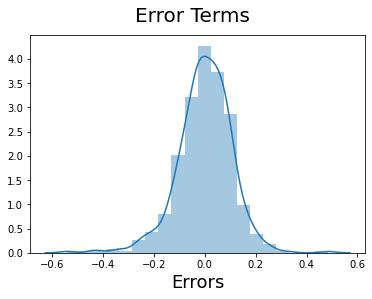

In [278]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
res = y_train - y_pred
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


In [279]:
# Checking columns 

X_test_new.shape

(510, 12)

In [280]:
res.shape

(510,)

## Making Predictions 

#### Applying the scaling on test sets

In [281]:
#Scaling the test data

num_vars=['temperature','humidity','windspeed','count']
Boombikes_test[num_vars] = scaler.transform(Boombikes_test[num_vars])

<ipython-input-281-4763436ba3f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boombikes_test[num_vars] = scaler.transform(Boombikes_test[num_vars])
/Users/aarnajaiswal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [283]:
Y_test = Boombikes_test.pop('count')
X_test = Boombikes_test


In [286]:
X_train_test=X_test_new.drop(['const'], axis=1)

In [287]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_2 = X_test[X_train_test.columns]

# Adding a constant variable 
X_test_2 = sm.add_constant(X_test_2)

In [288]:
#Making predictions on the chosen model

y_prediction = lm20.predict(X_test_2)

Text(0, 0.5, 'y_pred')

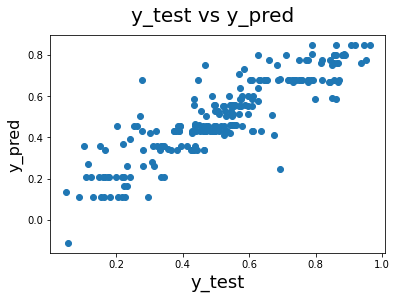

In [289]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(Y_test,y_prediction)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [290]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [291]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test, y_prediction))

0.1057636591801943

In [292]:
#Calculate the r square for test

r_squared = r2_score(Y_test, y_prediction)
r_squared

0.7660541637684203

In [298]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.76605)*(12-1)/(12-1-1)
print(Adj_r2)


0.7426550000000001


#### Here, We can see that r-square of test is similar to our trained model which had r-square of around 77.3

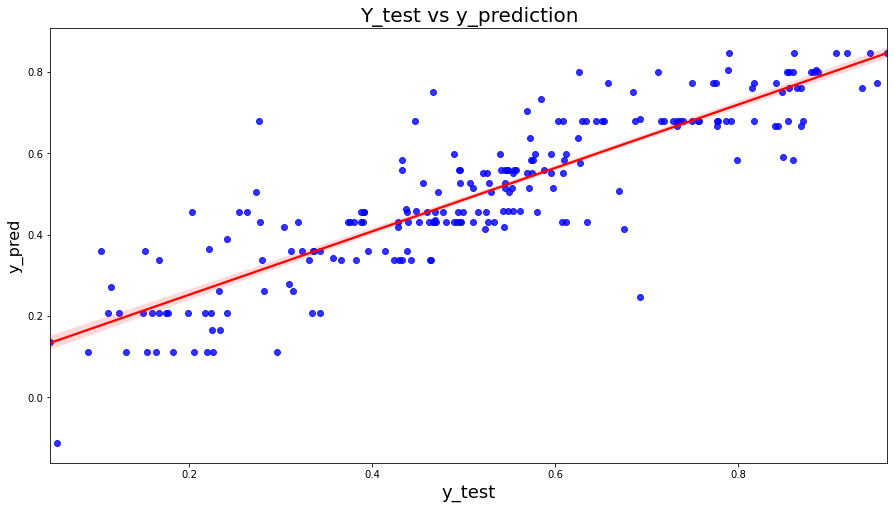

In [293]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=Y_test, y=y_prediction, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Y_test vs y_prediction', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

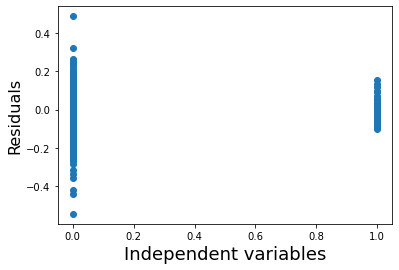

In [294]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation


X_t=X_train_test.iloc[:,0].values

plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()



When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [296]:
print(X_train_lm20.columns)
print(lm20.summary())

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'Year', 'holiday',
       'Oct', 'May', 'Mar', 'June', 'Aug'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.21e-152
Time:                        15:55:54   Log-Likelihood:                 416.75
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     498   BIC:                            -758.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025 

## Final Result

### For Train data set :
##### R square value = .773
##### Adj. R square value = .768

### For Test data set: 
#### R square value = .766
##### Adj. R square value = .7426 

#### Difference in R^2 between train and test: .7%¶
#### Difference in adjusted R^2 between Train and test: 2.6% which is less than 5%

### Yes! Its a best model



## Conclusion

#### The best fit line for our model is :

##  count=0.432+0.166 X Sep-0.3197 X Light Snow-0.0948 X Mist_Cloudy-0.2249 X spring +0.2475 X Year-0.0895 X holiday+0.0818 X Oct+0.0940 X May+0.0530 X Mar+0.1197 X June+0.126 X Aug

## Interpretation 

#### --We arrived at a very decent model for the the demand for shared bikes with the significant variables.

#### --We can see that the variable year has highest coefficient of 0.2475 units which means demand of bikes increses every year by .2475 units.

#### --We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow and holiday variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.¶


## Business Goals

#### -- US Bike comapany should focus more on March, May, June, August, September, October months as they have good influence on bike rentals.

#### --We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better.

#### -- We can see spring season has negative coefficients and negatively correlated to bike rentals. So US comapany can give some offers during that season to increase the demand.¶

#### --Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather... So there also company can think of giving some good offers and discounts.